Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [4]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. Upload a screenshot of the results.

In [30]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

html_data = requests.get(url).text

soup = BeautifulSoup(html_data, 'html.parser')


tables = soup.find_all('table')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        for row in table.find_all("tr"):
            cols = row.find_all("td")
            if len(cols) > 1:
                date = cols[0].text
                revenue = cols[1].text.replace('$', '').replace(',', '')
                
              
                if revenue:
                    try:
                        revenue = int(revenue) 
                    except ValueError:
                        revenue = None 
                else:
                    revenue = None

                new_row = pd.DataFrame({"Date": [date], "Revenue": [revenue]})
                tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)


tesla_revenue.dropna(inplace=True)

tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])


tesla_revenue.set_index('Date', inplace=True)


print(tesla_revenue.tail())

Empty DataFrame
Columns: [Revenue]
Index: []


Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [31]:
import yfinance as yf
import pandas as pd

# Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670627,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.


In [32]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Get page content
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Locate the correct revenue table
gme_revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_revenue_table = table
        break

# Check if table was found
if gme_revenue_table is None:
    print("GameStop revenue table not found.")
else:
    # Create the DataFrame
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    for row in gme_revenue_table.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue != "":
                gme_revenue = pd.concat(
                    [gme_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])],
                    ignore_index=True
                )

    # Display last five rows
    print(gme_revenue.tail())


GameStop revenue table not found.


Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

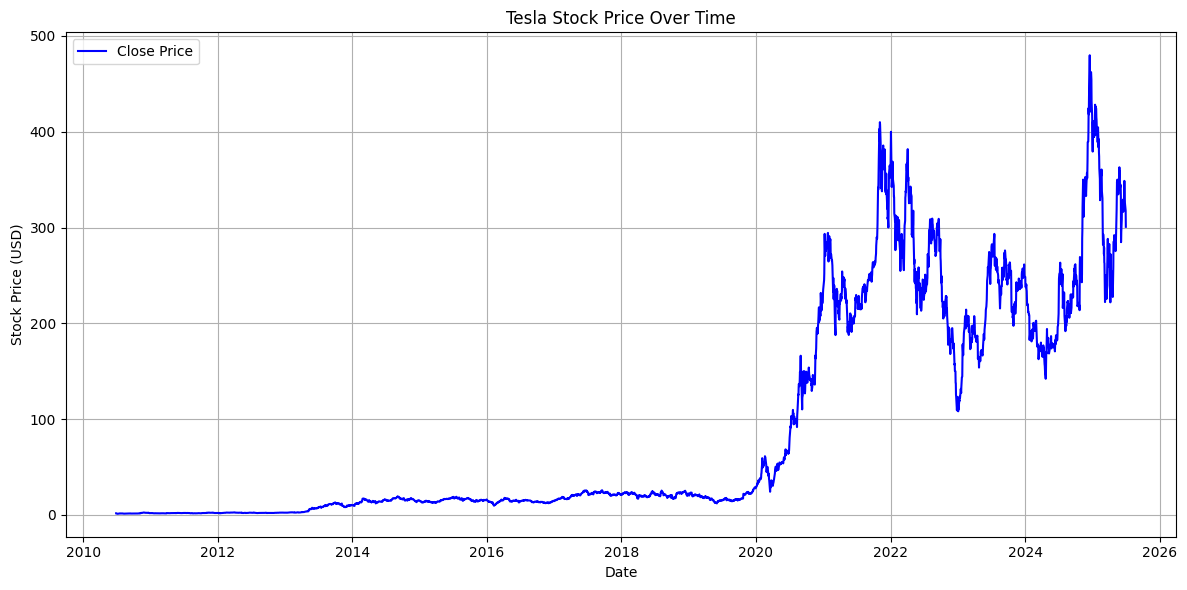

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline  


tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)


def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


make_graph(tesla_data, "Tesla Stock Price Over Time")


Question 6: Plot GameStop Stock Graph

Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph.

Upload a screenshot of your results.

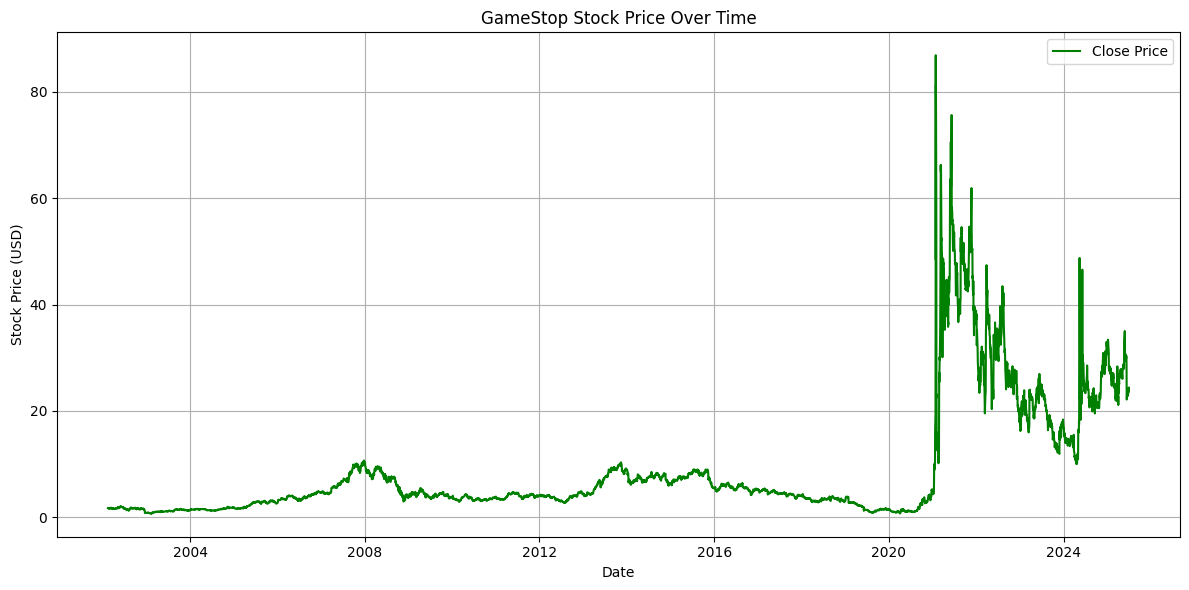

In [38]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
make_graph(gme_data, "GameStop Stock Price Over Time")
